In [36]:
import datetime
import matplotlib.pyplot as plt 
import numpy as np
import os
import pandas as pd
import pickle 
import seaborn as sns

%matplotlib inline

In [37]:
file1 = os.path.join(".", "processed_data", "data1.pkl")
file2 = os.path.join(".", "processed_data", "data2.pkl")

In [38]:
data_history = pd.read_pickle(file2)

detail_data = pd.read_pickle(file1)

In [39]:
detail_data.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [40]:
data_history.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [42]:
history_mean = data_history.groupby(["id"]).mean().reset_index()

In [43]:
six_month_mean = data_history[data_history["price_date"] >"2015-06-01"].groupby(["id"]).mean().reset_index()

In [44]:
three_month_mean = data_history[data_history["price_date"] >"2015-10-01"].groupby(["id"]).mean().reset_index()

In [45]:
history_mean=history_mean.rename(index=str, columns={"price_p1_var": "mean_year_price_p1_var",
                                               "price_p2_var": "mean_year_price_p2_var",
                                               "price_p3_var": "mean_year_price_p3_var",
                                               "price_p1_fix": "mean_year_price_p1_fix",
                                               "price_p2_fix": "mean_year_price_p2_fix",
                                               "price_p3_fix": "mean_year_price_p3_fix",})

history_mean["mean_year_price_p1"] = history_mean["mean_year_price_p1_var"] + history_mean["mean_year_price_p1_fix"]
history_mean["mean_year_price_p2"] = history_mean["mean_year_price_p2_var"] + history_mean["mean_year_price_p2_fix"]
history_mean["mean_year_price_p3"] = history_mean["mean_year_price_p3_var"] + history_mean["mean_year_price_p3_fix"]

In [46]:
history_mean.head()

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000


In [47]:
six_month_mean = six_month_mean.rename(index=str, columns={"price_p1_var": "mean_6m_price_p1_var",
                                             "price_p2_var": "mean_6m_price_p2_var",
                                             "price_p3_var": "mean_6m_price_p3_var",
                                             "price_p1_fix": "mean_6m_price_p1_fix",
                                             "price_p2_fix": "mean_6m_price_p2_fix",
                                             "price_p3_fix": "mean_6m_price_p3_fix",}) 


six_month_mean["mean_6m_price_p1"] = six_month_mean["mean_6m_price_p1_var"] + six_month_mean["mean_6m_price_p1_fix"]
six_month_mean["mean_6m_price_p2"] = six_month_mean["mean_6m_price_p2_var"] + six_month_mean["mean_6m_price_p2_fix"]
six_month_mean["mean_6m_price_p3"] = six_month_mean["mean_6m_price_p3_var"] + six_month_mean["mean_6m_price_p3_fix"]

In [48]:
three_month_mean = three_month_mean.rename(index=str, columns={"price_p1_var": "mean_3m_price_p1_var",
                                           "price_p2_var": "mean_3m_price_p2_var",
                                           "price_p3_var": "mean_3m_price_p3_var",
                                           "price_p1_fix": "mean_3m_price_p1_fix",
                                           "price_p2_fix": "mean_3m_price_p2_fix",
                                           "price_p3_fix": "mean_3m_price_p3_fix",})


three_month_mean["mean_3m_price_p1"] = three_month_mean["mean_3m_price_p1_var"] + three_month_mean["mean_3m_price_p1_fix"]
three_month_mean["mean_3m_price_p2"] = three_month_mean["mean_3m_price_p2_var"] + three_month_mean["mean_3m_price_p2_fix"]
three_month_mean["mean_3m_priceb_p3"] = three_month_mean["mean_3m_price_p3_var"] + three_month_mean["mean_3m_price_p3_fix"]    

In [49]:
six_month_mean.head()

,id,mean_6m_price_p1_var,mean_6m_price_p2_var,mean_6m_price_p3_var,mean_6m_price_p1_fix,mean_6m_price_p2_fix,mean_6m_price_p3_fix,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555,40.850151,24.539698,16.365283
1,0004351ebdd665e6ee664792efc4fd13,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000,44.589397,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000,46.146734,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.114428,0.096080,0.069418,40.728885,24.43733,16.291555,40.843313,24.533410,16.360973
4,00114d74e963e47177db89bc70108537,0.146184,0.000000,0.000000,44.266930,0.00000,0.000000,44.413114,0.000000,0.000000


In [50]:
three_month_mean.head()

,id,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_priceb_p3
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
4,00114d74e963e47177db89bc70108537,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


As the values three month mean and six month mean are may or may not contribute to the model. to the feature list we will add history mean and will make changes if necessary after comparing co-relation between them. 

In [51]:
features = history_mean

Working with dates. As individual dates have less chances to contribution we can extract meaning full information by performing arthmatic operations among them. 

In [52]:
features

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972,41.035291,24.752581,16.588752
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,44.458512,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,41.314049,25.025265,16.858411
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,40.730558,24.467516,16.316414


In [53]:
detail_data["tenure_years"] = ((detail_data["date_end"]- detail_data["date_activ"])/np.timedelta64(1, "Y")).astype(int)

In [54]:
detail_data["tenure_years"].head()

0    3
1    3
2    7
3    6
4    6
Name: tenure_years, dtype: int32

As we got the tenure years now lets us form group based on the tenur year column to club the companies with same tenure years together. 

In [55]:
churn_tenure = detail_data[["tenure_years", "churn", "id"]].groupby(["tenure_years", "churn"])["id"].count().unstack(level=1)

churn_tenure_percentage = (churn_tenure.div(churn_tenure.sum(axis=1), axis=0)*100)

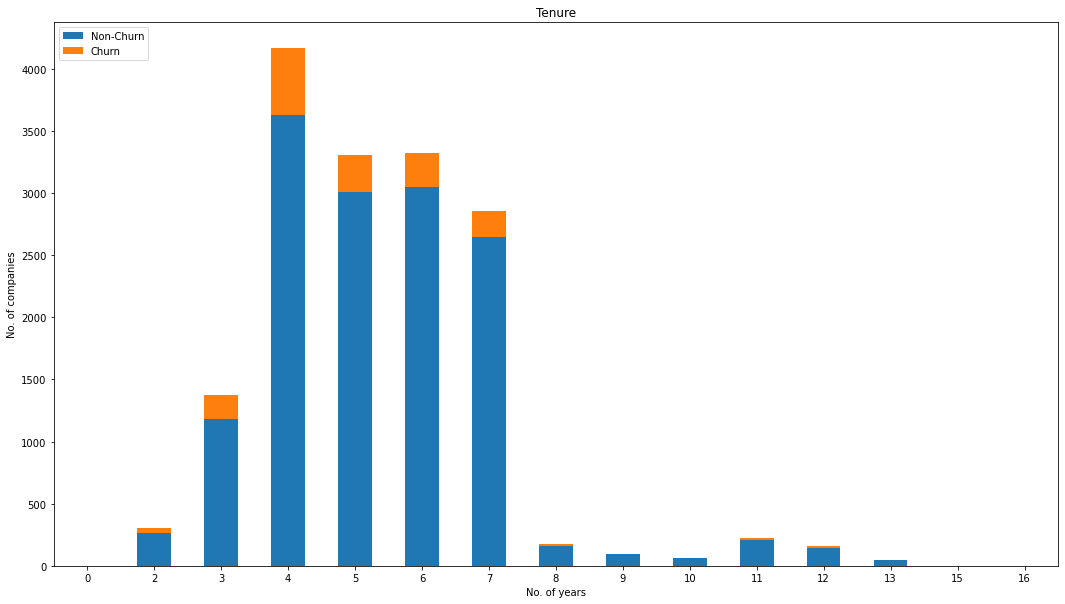

In [19]:
churn_tenure.plot(kind="bar",figsize=(18,10),stacked=True,rot=0,title = "Tenure")

# Rename legend

plt.legend(["Non-Churn", "Churn"], loc = "upper left")

# Labels

plt.ylabel("No. of companies")
plt.xlabel("No. of years")
plt.show()

From Above graph this is clear that the companies with the tenure three to seven years has higher chance to churn at same time retention is also high for these years.

Based on the reference date 01-01-2016 we can add four more column to the dataframe wich are 

moths active. 
months to end
months modified
months renewal



In [56]:
validation_date = datetime.datetime(2016,1,1)

In [57]:
validation_date

datetime.datetime(2016, 1, 1, 0, 0)

In [58]:
def convert_dates(reference_date, dataframe, column):
    """    Input a column with timedeltas and return months    """
    time_delta = validation_date - dataframe[column]
    months = (time_delta/np.timedelta64(1, "M")).astype(int)
    return months

In [59]:
detail_data["months_activ"] =  convert_dates(validation_date, detail_data, "date_activ")
detail_data["months_to_end"] = -convert_dates(validation_date, detail_data, "date_end")
detail_data["months_modif_prod"] = convert_dates(validation_date, detail_data, "date_modif_prod")
detail_data["months_renewal"] = convert_dates(validation_date, detail_data, "date_renewal")

In [60]:
detail_data.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,net_margin,num_years_antig,origin_up,pow_max,churn,tenure_years,months_activ,months_to_end,months_modif_prod,months_renewal
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0,3,37,10,37,1
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,3,30,5,2,6
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,7,76,7,76,4
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,6,68,3,68,8
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,6,69,2,69,9


In [61]:
def plot_churn_by_month(dataframe, column, fontsize_=11):
    """    Plot churn distribution by monthly variable    """
    temp = dataframe[[column, "churn", "id"]].groupby([column, "churn"])["id"].count().unstack(level=1)
    temp.plot(kind="bar",figsize=(18,10),stacked=True,rot=0,title=column)
    # Rename legend
    plt.legend(["Non-Churn", "Churn"], loc = "upper left")
    
    # Labels
    plt.ylabel("No. of companies")
    plt.xlabel("No. of months")
    # Set xlabel fontsize
    plt.xticks(fontsize=fontsize_)
    plt.show()

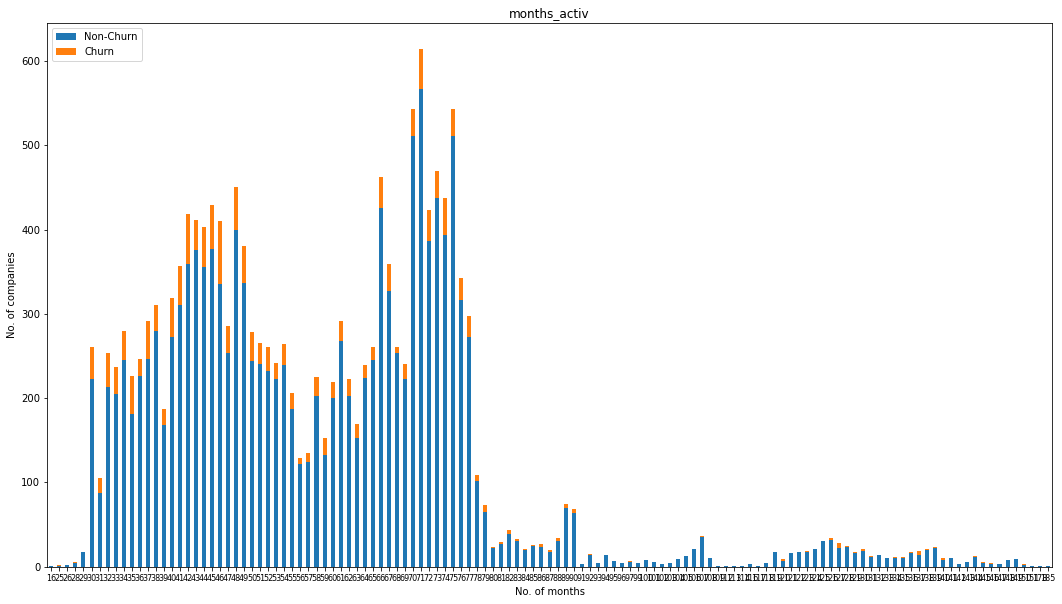

In [62]:
plot_churn_by_month(detail_data, "months_activ", 8)

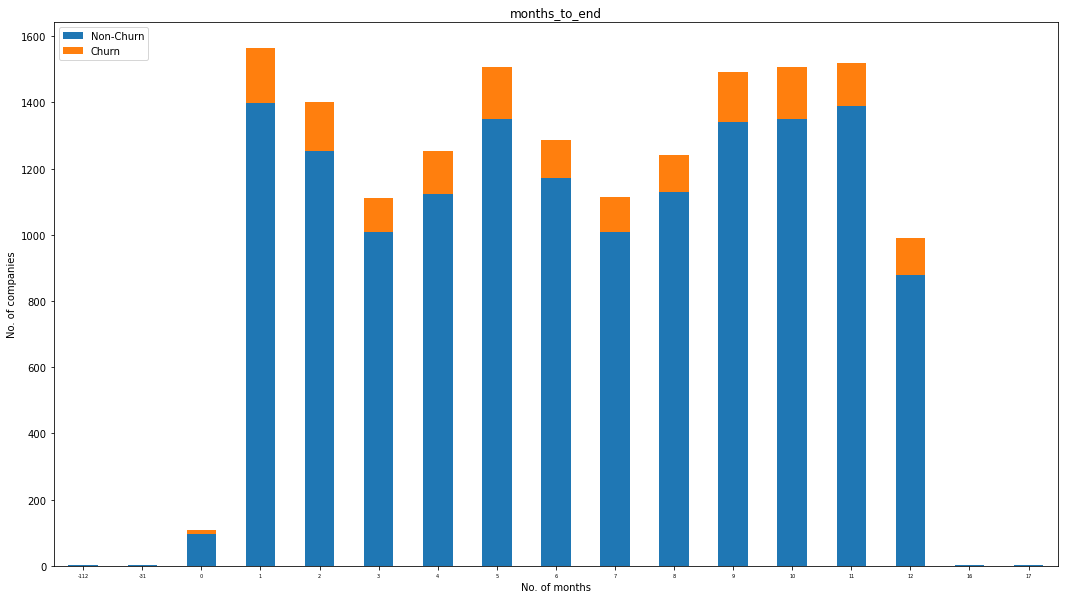

In [63]:
plot_churn_by_month(detail_data, "months_to_end", 5)    

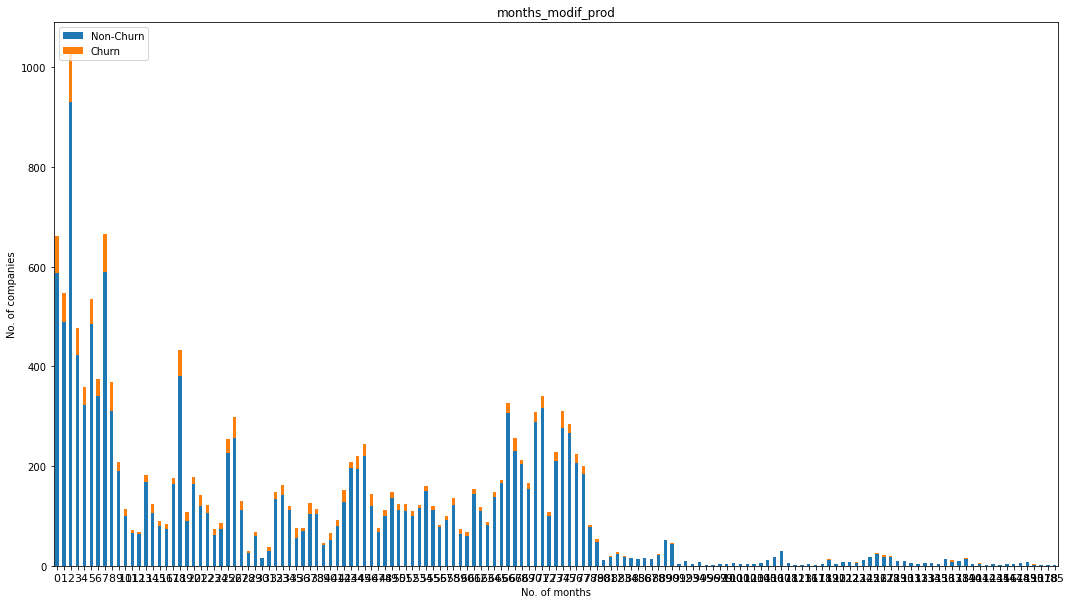

In [64]:
plot_churn_by_month(detail_data, "months_modif_prod")

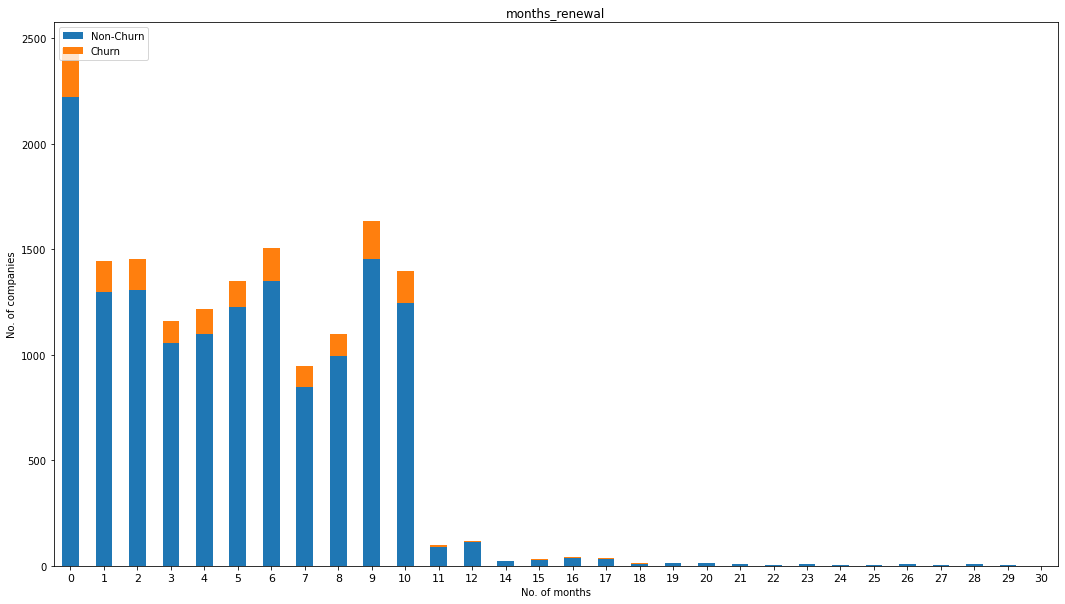

In [65]:
plot_churn_by_month(detail_data, "months_renewal")

As we derived the columns months active and etc. these columns elimate the dependencies of the date columns so we can delete them.

In [66]:
detail_data.drop(columns=["date_activ", "date_end", "date_modif_prod", "date_renewal"],inplace=True)

In [67]:
detail_data.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,...,net_margin,num_years_antig,origin_up,pow_max,churn,tenure_years,months_activ,months_to_end,months_modif_prod,months_renewal
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,26520.30,10025,0.0,359.29,...,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0,3,37,10,37,1
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,...,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,3,30,5,2,6
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,0,189.95,0,0.0,16.27,...,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,7,76,7,76,4
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,...,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,6,68,3,68,8
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,...,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,6,69,2,69,9


we have considered has gas column it is not numeric. we have to convert it to numeric data. 

In [68]:
detail_data["has_gas"] = detail_data["has_gas"].replace(["t", "f"],[1,0])

In [69]:
detail_data["has_gas"].head()

0    0
1    1
2    0
3    0
4    0
Name: has_gas, dtype: int64

In [70]:
detail_data["channel_sales"] = detail_data["channel_sales"].fillna("null_values_channel")

In [71]:
detail_data["channel_sales"] = detail_data["channel_sales"].astype("category")

In [72]:
type(detail_data["channel_sales"])

pandas.core.series.Series

In [73]:
pd.DataFrame({"Samples in category": detail_data["channel_sales"].value_counts()})

,Samples in category
foosdfpfkusacimwkcsosbicdxkicaua,7377
null_values_channel,4218
lmkebamcaaclubfxadlmueccxoimlema,2073
usilxuppasemubllopkaafesmlibmsdf,1444
ewpakwlliwisiwduibdlfmalxowmwpci,966
sddiedcslfslkckwlfkdpoeeailfpeds,12
epumfxlbckeskwekxbiuasklxalciiuu,4
fixdbufsefwooaasfcxdxadsiekoceaa,2


In [74]:
channel_categories = pd.get_dummies(detail_data["channel_sales"], prefix="channel")

In [75]:
channel_categories.columns

Index(['channel_epumfxlbckeskwekxbiuasklxalciiuu',
       'channel_ewpakwlliwisiwduibdlfmalxowmwpci',
       'channel_fixdbufsefwooaasfcxdxadsiekoceaa',
       'channel_foosdfpfkusacimwkcsosbicdxkicaua',
       'channel_lmkebamcaaclubfxadlmueccxoimlema',
       'channel_null_values_channel',
       'channel_sddiedcslfslkckwlfkdpoeeailfpeds',
       'channel_usilxuppasemubllopkaafesmlibmsdf'],
      dtype='object')

In [76]:
channel_categories.columns = [col_name[:15] for col_name in channel_categories.columns]

In [77]:
channel_categories

,channel_epumfxl,channel_ewpakwl,channel_fixdbuf,channel_foosdfp,channel_lmkebam,channel_null_va,channel_sddiedc,channel_usilxup
0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
16091,0,0,0,1,0,0,0,0
16092,0,0,0,1,0,0,0,0
16093,0,0,0,1,0,0,0,0
16094,0,0,0,1,0,0,0,0


In [78]:
channel_categories.drop(columns=["channel_null_va"],inplace=True)

In [79]:
detail_data["origin_up"] = detail_data["origin_up"].fillna("null_values_origin")

In [80]:
detail_data["origin_up"] = detail_data["origin_up"].astype("category")

In [81]:
pd.DataFrame({"Samples in category": detail_data["origin_up"].value_counts()})

,Samples in category
lxidpiddsbxsbosboudacockeimpuepw,7825
kamkkxfxxuwbdslkwifmmcsiusiuosws,4517
ldkssxwpmemidmecebumciepifcamkci,3664
null_values_origin,87
usapbepcfoloekilkwsdiboslwaxobdp,2
ewxeelcelemmiwuafmddpobolfuxioce,1


In [82]:
origin_categories = pd.get_dummies(detail_data["origin_up"], prefix="origin")
# Rename columns for simplicity 
origin_categories.columns = [col_name[:10] for col_name in origin_categories.columns]

In [83]:
origin_categories.head()

,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_nul,origin_usa
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [84]:
origin_categories.drop(columns=["origin_nul"],inplace=True)

In [85]:
detail_data["activity_new"] = detail_data["activity_new"].fillna("null_values_activity")

In [86]:
activity_categories = pd.DataFrame({"Activity samples":detail_data["activity_new"].value_counts()})
activity_categories

,Activity samples
null_values_activity,9545
apdekpcbwosbxepsfxclislboipuxpop,1577
kkklcdamwfafdcfwofuscwfwadblfmce,422
kwuslieomapmswolewpobpplkaooaaew,230
fmwdwsxillemwbbwelxsampiuwwpcdcb,219
...,...
exmccxcauwolkacaceedipbcmodfedfl,1
dbklukmppmseoekmmxfolmfbdidmawls,1
ikiucmkuisupefxcxfxxulkpwssppfuo,1
uuxeifdawaobxfxxefkdfxkmsmbfoamf,1


In [87]:
to_replace = list(activity_categories[activity_categories["Activity samples"] <=75].index)

# Replace them with `null_values_categories`

detail_data["activity_new"]=detail_data["activity_new"].replace(to_replace,"null_values_activity")

In [88]:
activity_categories = pd.get_dummies(detail_data["activity_new"], prefix="activity")
# Rename columns for simplicity

activity_categories.columns = [col_name[:12] for col_name in activity_categories.columns]

In [89]:
activity_categories

,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_nul,activity_sfi,activity_wxe
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
16091,0,0,0,0,0,0,0,1,0,0
16092,0,0,0,0,0,0,0,1,0,0
16093,0,0,0,0,0,0,0,1,0,0
16094,0,0,0,0,0,0,0,1,0,0


In [90]:
activity_categories.drop(columns=["activity_nul"],inplace=True)

In [91]:
detail_data = pd.merge(detail_data, channel_categories, left_index=True, right_index=True)
detail_data = pd.merge(detail_data, origin_categories, left_index=True, right_index=True)
detail_data = pd.merge(detail_data, activity_categories, left_index=True, right_index=True)

In [92]:
detail_data

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,...,origin_usa,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_sfi,activity_wxe
0,48ada52261e7cf58715202705a0451c9,null_values_activity,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,26520.30,10025,0.0,359.29,...,0,0,0,0,0,0,0,0,0,0
1,24011ae4ebbe3035111d65fa7c15bc57,null_values_activity,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,...,0,0,0,0,0,0,0,0,0,0
2,d29c2c54acc38ff3c0614d0a653813dd,null_values_activity,null_values_channel,4660,0,0,189.95,0,0.0,16.27,...,0,0,0,0,0,0,0,0,0,0
3,764c75f661154dac3a6c254cd082ea7d,null_values_activity,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,...,0,0,0,0,0,0,0,0,0,0
4,bba03439a292a1e166f80264c16191cb,null_values_activity,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,null_values_activity,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,4648.01,0,0.0,18.57,...,0,0,0,0,0,0,0,0,0,0
16092,d0a6f71671571ed83b2645d23af6de00,null_values_activity,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,631.69,181,0.0,144.03,...,0,0,0,0,0,0,0,0,0,0
16093,10e6828ddd62cbcf687cb74928c4c2d2,null_values_activity,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,190.39,179,0.0,129.60,...,0,0,0,0,0,0,0,0,0,0
16094,1cf20fd6206d7678d5bcafd28c53b4db,null_values_activity,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,19.34,0,0.0,7.18,...,0,0,0,0,0,0,0,0,0,0


In [93]:
detail_data.drop(columns=["channel_sales", "origin_up", "activity_new"],inplace=True)

In [94]:
detail_data.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,...,origin_usa,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_sfi,activity_wxe
0,48ada52261e7cf58715202705a0451c9,309275,0,10025,26520.30,10025,0.0,359.29,0.095919,0.088347,...,0,0,0,0,0,0,0,0,0,0
1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,0,0,0,0,0,0,0,0,0,0
2,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,0,0,0,0,0,0,0,0,0,0
4,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,0,0,0,0,0,0,0,0,0,0


removing the negative vlaues

and transforming the highly skewed data into normal distribution by log transformation

In [95]:
detail_data.loc[detail_data.cons_12m < 0,"cons_12m"] = np.nan 
detail_data.loc[detail_data.cons_gas_12m < 0,"cons_gas_12m"] = np.nan
detail_data.loc[detail_data.cons_last_month < 0,"cons_last_month"] = np.nan
detail_data.loc[detail_data.forecast_cons_12m < 0,"forecast_cons_12m"] = np.nan
detail_data.loc[detail_data.forecast_cons_year < 0,"forecast_cons_year"] = np.nan
detail_data.loc[detail_data.forecast_meter_rent_12m < 0,"forecast_meter_rent_12m"] = np.nan 
detail_data.loc[detail_data.imp_cons < 0,"imp_cons"] = np.nan

In [96]:
detail_data["cons_12m"] = np.log10(detail_data["cons_12m"]+1)
detail_data["cons_gas_12m"] = np.log10(detail_data["cons_gas_12m"]+1)
detail_data["cons_last_month"] =np.log10(detail_data["cons_last_month"]+1)
detail_data["forecast_cons_12m"] =np.log10(detail_data["forecast_cons_12m"]+1)
detail_data["forecast_cons_year"] =np.log10(detail_data["forecast_cons_year"]+1)
detail_data["forecast_meter_rent_12m"] =np.log10(detail_data["forecast_meter_rent_12m"]+1)
detail_data["imp_cons"] =np.log10(detail_data["imp_cons"]+1)

As we have transformed data we are about to check the distribution. 

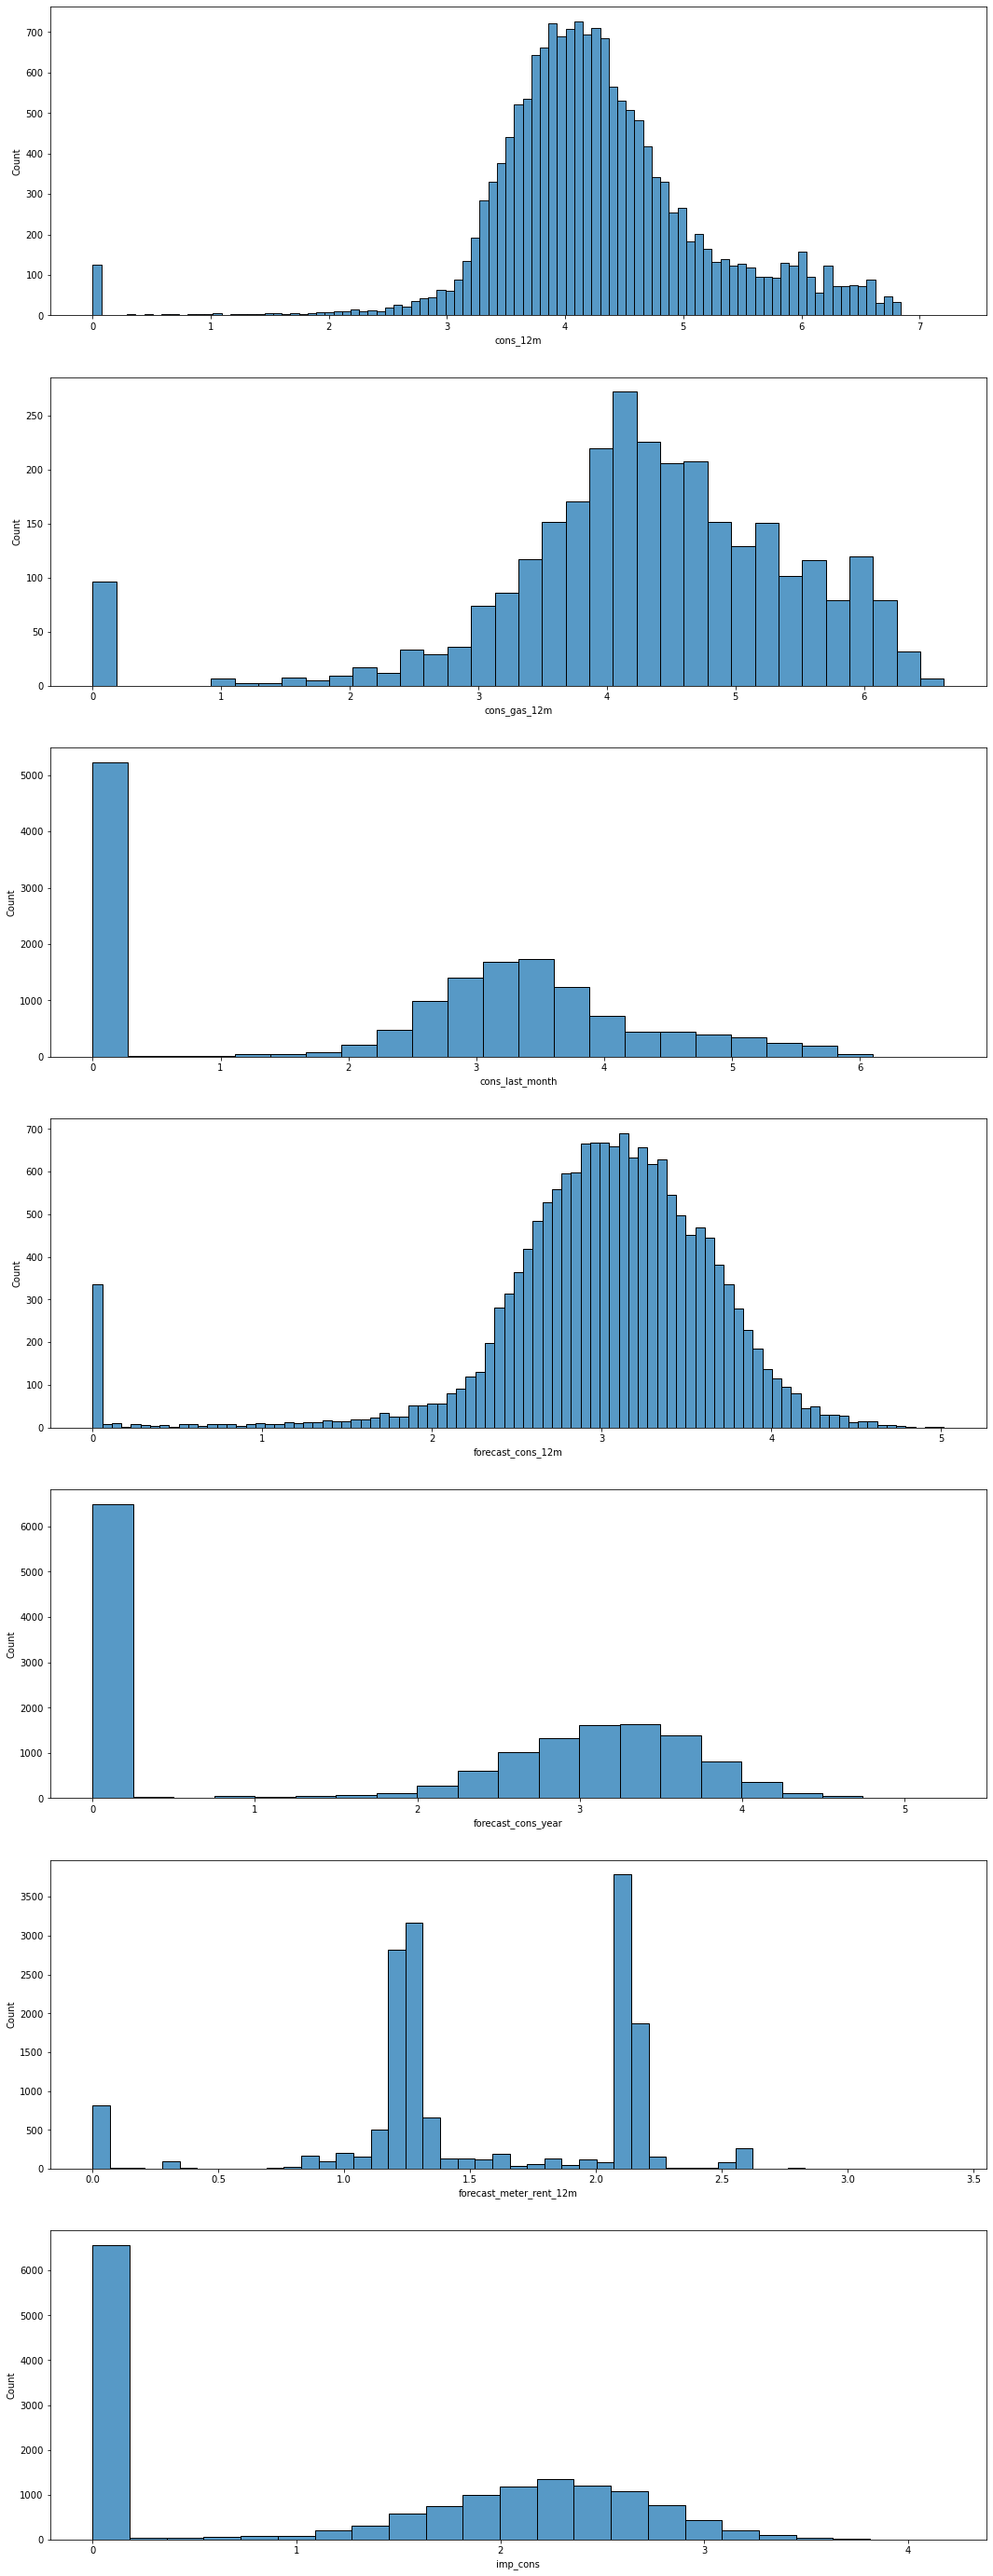

In [97]:
fig, axs=plt.subplots(nrows=7, figsize=(18,50))
# Plot histograms
sns.histplot(x = (detail_data["cons_12m"].dropna()), ax=axs[0])
sns.histplot(x = (detail_data[detail_data["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.histplot(x = (detail_data["cons_last_month"].dropna()), ax=axs[2])
sns.histplot(x = (detail_data["forecast_cons_12m"].dropna()), ax=axs[3])
sns.histplot(x = (detail_data["forecast_cons_year"].dropna()), ax=axs[4])
sns.histplot(x = (detail_data["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.histplot(x = (detail_data["imp_cons"].dropna()), ax=axs[6])
plt.show()

From above distribution plot, we can say that the data is almost distributed normally. 

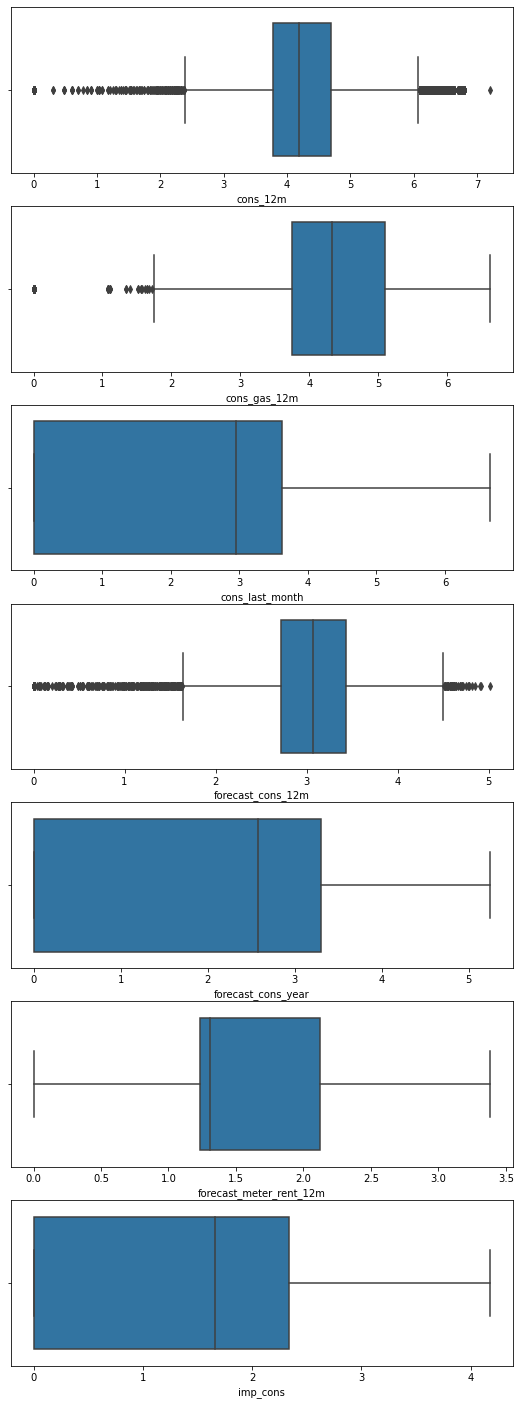

In [98]:
fig, axs=plt.subplots(nrows=7, figsize=(9,25))
# Plot boxplots
sns.boxplot(x = (detail_data["cons_12m"].dropna()), ax=axs[0])
sns.boxplot(x = (detail_data[detail_data["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.boxplot(x = (detail_data["cons_last_month"].dropna()), ax=axs[2])
sns.boxplot(x = (detail_data["forecast_cons_12m"].dropna()), ax=axs[3])
sns.boxplot(x = (detail_data["forecast_cons_year"].dropna()), ax=axs[4])
sns.boxplot(x = (detail_data["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.boxplot(x = (detail_data["imp_cons"].dropna()), ax=axs[6])
plt.show()

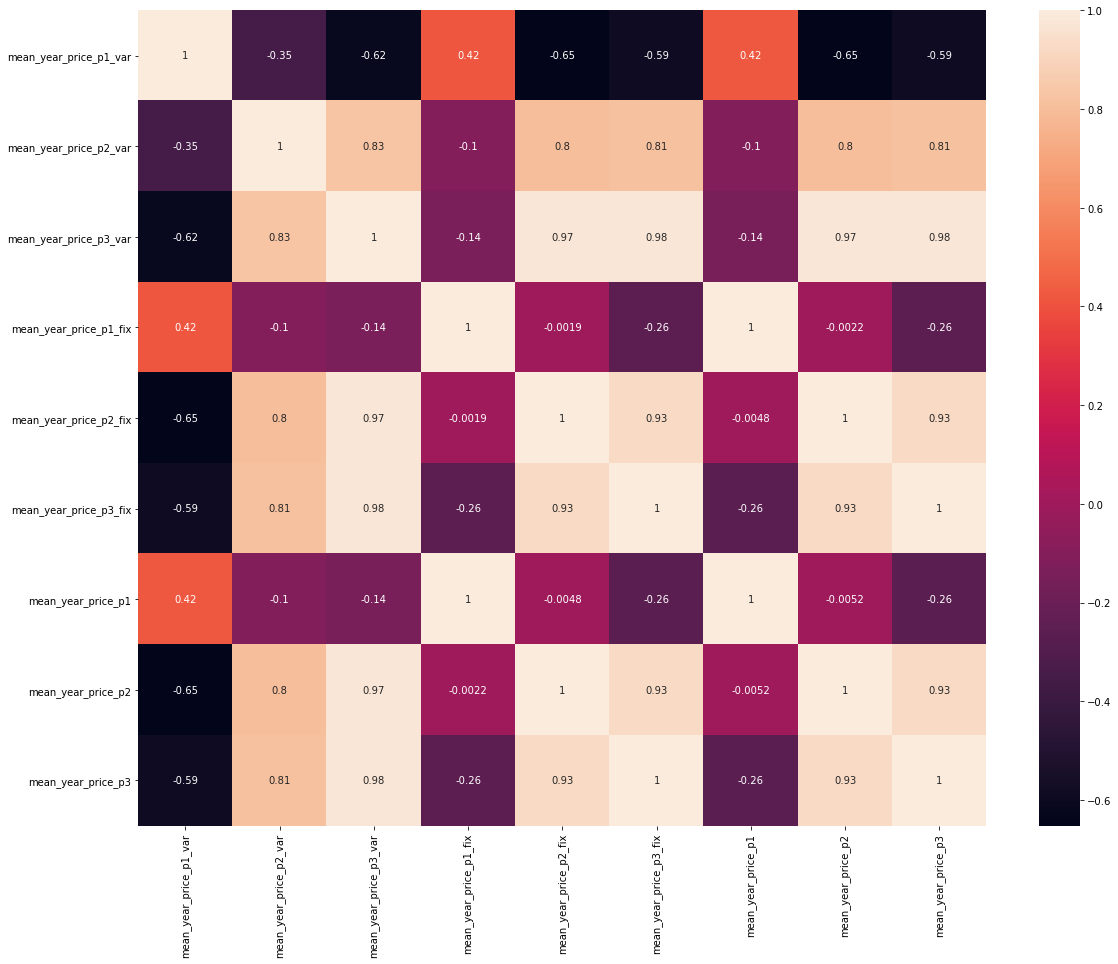

In [99]:
correlation=features.corr()

# Plot correlation

plt.figure(figsize=(19,15))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values, annot=True, 
            annot_kws={'size':10})

# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [100]:
correlation=detail_data.corr()

In [101]:
detail_data.drop(columns=["num_years_antig", "forecast_cons_year"],inplace=True)

In [102]:
detail_data.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,origin_usa,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_sfi,activity_wxe
0,48ada52261e7cf58715202705a0451c9,5.490346,0.000000,4.001128,4.423595,0.0,2.556652,0.095919,0.088347,58.995952,...,0,0,0,0,0,0,0,0,0,0
1,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,0,0,0,0,0,0,0,0,0,0
2,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,0,0,0,0,0,0,0,0,0,0
3,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,0,0,0,0,0,0,0,0,0,0
4,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,0,0,0,0,0,0,0,0,0,0


In [103]:
def delete_outlier(dataframe, column, Z=3):
    """    Replace outliers with the mean values using the Z score.    
    Nan values are also replaced with the mean values.    Parameters    ----------    
    dataframe : pandas dataframe        Contains the data where the outliers are to be found    
    column : str        Usually a string with the name of the column     Returns    -------    
    Dataframe        With outliers under the lower and above the upper bound removed    """
    
    from scipy.stats import zscore
    
    df = dataframe.copy(deep=True)
    
    df.dropna(inplace=True, subset=[column])
    
    # Calculate mean without outliers
    
    df["zscore"] = zscore(df[column])
    mean = df[(df["zscore"] >-Z) & (df["zscore"] <Z)][column].mean()
    
    # Replace with mean values
    
    no_outliers = dataframe[column].isnull().sum()
    dataframe[column] = dataframe[column].fillna(mean)
    dataframe["zscore"] = zscore(dataframe[column])
    dataframe.loc[(dataframe["zscore"] <-Z) | (dataframe["zscore"] >Z),column] = mean
    # Print message
    print("Replaced:", no_outliers, " outliers in ", column)
    return dataframe.drop(columns="zscore")

In [104]:
for c in features.columns:
    if c != "id":
        features = delete_outlier(features,c)

Replaced: 0  outliers in  mean_year_price_p1_var
Replaced: 0  outliers in  mean_year_price_p2_var
Replaced: 0  outliers in  mean_year_price_p3_var
Replaced: 0  outliers in  mean_year_price_p1_fix
Replaced: 0  outliers in  mean_year_price_p2_fix
Replaced: 0  outliers in  mean_year_price_p3_fix
Replaced: 0  outliers in  mean_year_price_p1
Replaced: 0  outliers in  mean_year_price_p2
Replaced: 0  outliers in  mean_year_price_p3


In [105]:
features.reset_index(drop=True, inplace=True)

In [106]:
def finding_IQR(dataframe, column):
    """    Find outliers using the 1.5*IQR rule.    
    Parameters    ----------    dataframe : pandas dataframe        
    Contains the data where the outliers are to be found    column : str        
    Usually a string with the name of the column     Returns    -------    Dict        
    With the values of the iqr, lower_bound and upper_bound    """
    
    col = sorted(dataframe[column])
    
    q1, q3 = np.percentile(col,[25,75])
    
    iqr = q3-q1
    lower_bound = q1 - (1.5 * iqr) 
    upper_bound = q3 + (1.5 * iqr)
    results = {"iqr": iqr, "lower_bound":lower_bound, "upper_bound":upper_bound}
    return results

In [107]:
def remove_outliers_iqr(dataframe, column):
    
    """    Remove outliers using the 1.5*IQR rule.    
    Parameters    ----------    dataframe : pandas dataframe        
    Contains the data where the outliers are to be found    column : str        
    Usually a string with the name of the column     Returns    -------    Dataframe        
    With outliers der the lower and above the upper bound removed    """
    
    outliers = finding_IQR(dataframe, column)
    removed = dataframe[(dataframe[column] < outliers["lower_bound"]) | (dataframe[column] > outliers["upper_bound"])].shape
    dataframe = dataframe[(dataframe[column] > outliers["lower_bound"]) & (dataframe[column] < outliers["upper_bound"])]
    print("Removed:", removed[0], " outliers")
    return dataframe

In [108]:
def remove_outliers_z_score(dataframe, column, Z=3):
    """    Remove outliers using the Z score. Values with more than 3 are removed.    
    Parameters    ----------    dataframe : pandas dataframe        
    Contains the data where the outliers are to be found    column : str       
    Usually a string with the name of the column     Returns    -------    Dataframe      
    With outliers under the lower and above the upper bound removed    """
     
    from scipy.stats import zscore
    dataframe["zscore"] = zscore(dataframe[column])
    removed = dataframe[(dataframe["zscore"] < -Z) | (dataframe["zscore"] >Z)].shape
    dataframe = dataframe[(dataframe["zscore"] >-Z) & (dataframe["zscore"] <Z)]
    print("Removed:", removed[0], " outliers of ", column)
    return dataframe.drop(columns="zscore")

In [109]:
detail_data = delete_outlier(detail_data,"cons_12m")
detail_data = delete_outlier(detail_data,"cons_gas_12m")
detail_data = delete_outlier(detail_data,"cons_last_month")
detail_data = delete_outlier(detail_data,"forecast_cons_12m")
detail_data = delete_outlier(detail_data,"forecast_discount_energy")
detail_data = delete_outlier(detail_data,"forecast_meter_rent_12m")
detail_data = delete_outlier(detail_data,"forecast_price_energy_p1")
detail_data = delete_outlier(detail_data,"forecast_price_energy_p2")
detail_data = delete_outlier(detail_data,"forecast_price_pow_p1")
detail_data = delete_outlier(detail_data,"imp_cons")
detail_data = delete_outlier(detail_data,"margin_gross_pow_ele")
detail_data = delete_outlier(detail_data,"margin_net_pow_ele")
detail_data = delete_outlier(detail_data,"net_margin")
detail_data = delete_outlier(detail_data,"pow_max")
detail_data = delete_outlier(detail_data,"months_activ")
detail_data = delete_outlier(detail_data,"months_to_end")
detail_data = delete_outlier(detail_data,"months_modif_prod")
detail_data = delete_outlier(detail_data,"months_renewal")

Replaced: 27  outliers in  cons_12m
Replaced: 6  outliers in  cons_gas_12m
Replaced: 46  outliers in  cons_last_month
Replaced: 41  outliers in  forecast_cons_12m
Replaced: 126  outliers in  forecast_discount_energy
Replaced: 4  outliers in  forecast_meter_rent_12m
Replaced: 126  outliers in  forecast_price_energy_p1
Replaced: 126  outliers in  forecast_price_energy_p2
Replaced: 126  outliers in  forecast_price_pow_p1
Replaced: 27  outliers in  imp_cons
Replaced: 13  outliers in  margin_gross_pow_ele
Replaced: 13  outliers in  margin_net_pow_ele
Replaced: 15  outliers in  net_margin
Replaced: 3  outliers in  pow_max
Replaced: 0  outliers in  months_activ
Replaced: 0  outliers in  months_to_end
Replaced: 0  outliers in  months_modif_prod
Replaced: 0  outliers in  months_renewal


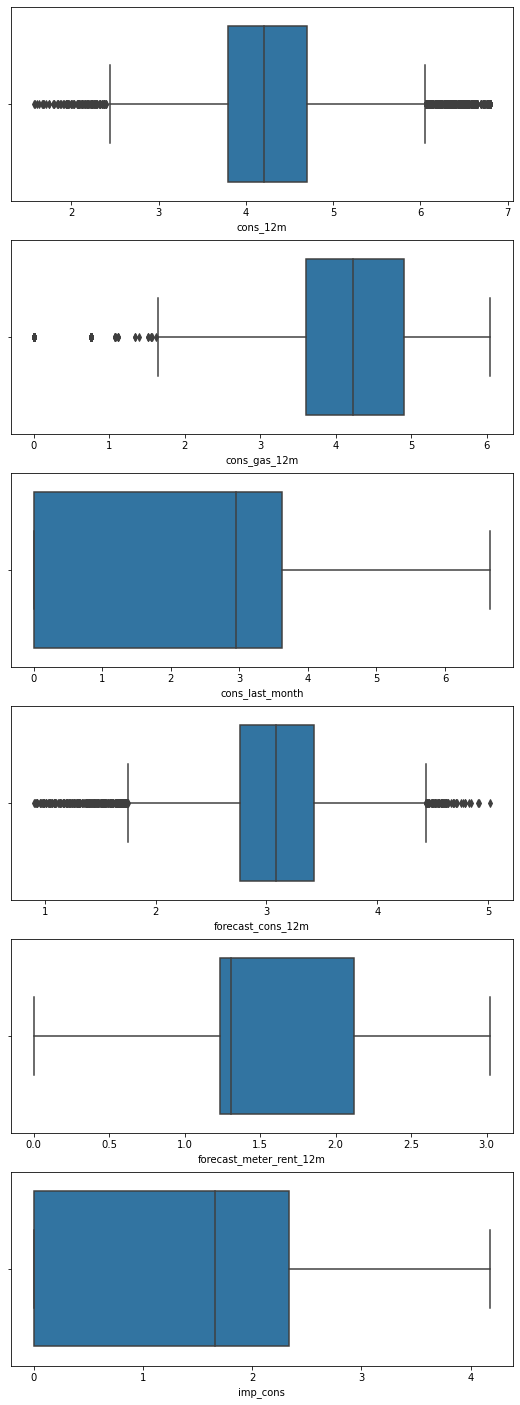

In [110]:
fig, axs=plt.subplots(nrows=6, figsize=(9,25))
# Plot boxplots
sns.boxplot(x = (detail_data["cons_12m"].dropna()), ax=axs[0])
sns.boxplot(x = (detail_data[detail_data["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.boxplot(x = (detail_data["cons_last_month"].dropna()), ax=axs[2])
sns.boxplot(x = (detail_data["forecast_cons_12m"].dropna()), ax=axs[3])
sns.boxplot(x = (detail_data["forecast_meter_rent_12m"].dropna()), ax=axs[4])
sns.boxplot(x = (detail_data["imp_cons"].dropna()), ax=axs[5])
plt.show()


In [111]:
data4_DIR = os.path.join(".", "processed_data", "data1.pkl")
data2_DIR = os.path.join(".", "processed_data", "features.pkl")
detail_data_DIR = os.path.join(".", "processed_data", "detail_data.pkl")

In [112]:
data2_DIR

'.\\processed_data\\features.pkl'

In [113]:
#pd.to_pickle(data4, data4_DIR)
pd.to_pickle(features, data2_DIR)
pd.to_pickle(detail_data, detail_data_DIR)